Question 1

In [38]:
import matplotlib.pyplot as plt
import numpy as np

In [39]:
def generateData(d, N, noise=0.1):
    np.random.seed(12345)
    X = np.concatenate([np.ones([N, 1]), np.random.randn(N, d)], axis=1)
    lambdaTrue = -1 + 2 * np.tan(np.random.randn(len(X[0])))
    Y = 1 * ((X @ lambdaTrue + noise * np.random.randn(N)) > 0)
    D = X, Y
    return D

In [40]:
def split(D, train_size):
    x, y = D
    x_trainning = []
    x_testing = []
    y_traning = []
    y_testing = []
    for i in range(0, train_size):
        x_trainning.append(x[i])
        y_traning.append(y[i])
    for i in range(train_size, len(y)):
        x_testing.append(x[i])
        y_testing.append(y[i])
    return x_trainning, x_testing, y_traning, y_testing

In [41]:
def model(x, par):
    z = x @ par
    return 1 / (np.exp(-z) + 1)
    # return np.power(1 / (1 + np.power(np.e, -z)), -1)

In [42]:
def dModel(x, par):
    # f = np.power((1 + np.power(np.e, (np.dot(x, par)))), -1)
    f = np.power(1 + np.power(np.e, -np.dot(x, par)), -1)
    gradient = np.dot(f * (1 - f), x)
    return gradient

In [43]:
def objective(par, data):
    ell = 0
    X, Y = data
    for n in range(0, len(X)):
        x, y = X[n], Y[n]
        # f = np.power((np.dot(par,x)),np.e)
        f = model(x, par)
        if y != 1:
            f = 1 - f
        s = -(np.log(f))
        ell = ell + s
    return ell

In [44]:
def gradient(par, data):
    grad = np.zeros(len(par))
    X, Y = data
    for n in range(0, len(X)):
        f = model(X[n], par)
        x, y = X[n], Y[n]
        s = -(y - f) / (y * f + (1 - y) * (1 - f))
        grad = grad + s * (dModel(x, par))
    return grad

In [45]:
def train(par0, eta, T, data):
    par = par0
    obj = []
    for t in range(0, T):
        ell = objective(par, data)
        obj.append(ell)
        grad = gradient(par, data)
        par = par - grad * eta
    return par, obj

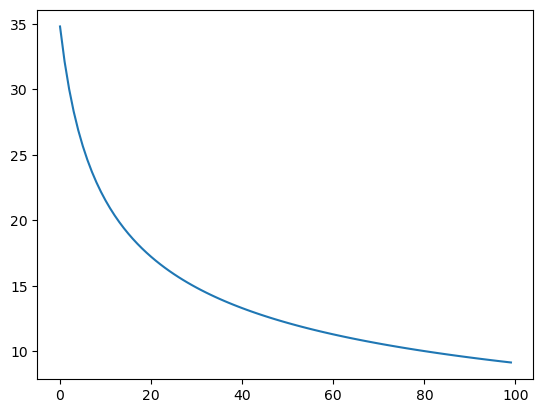

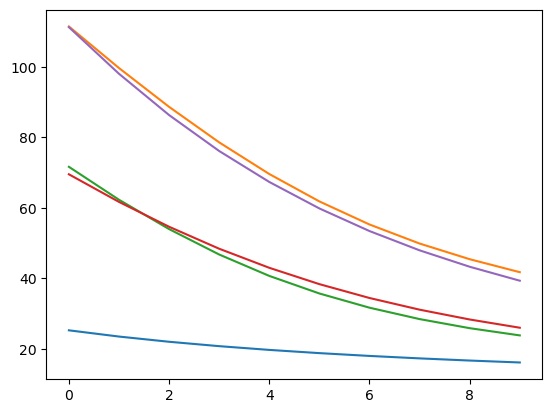

In [46]:
lambda1 = np.transpose(np.full(11, 0.01))
d = 10
N = 100
D = generateData(d, N)
x_trainning, x_testing, y_traning, y_testing = split(D, 50)
eta = 0.01
epoch = []
itterations = 10
tryInit = [np.random.randn(len(x_trainning[0])) for m in range(5)]
par, obj = train(lambda1, eta, 100, (x_trainning, y_traning))
plt.plot(obj)
plt.show()
for init in tryInit:
    par, values = train(init, eta, itterations, (x_trainning, y_traning))
    epoch.append((par, values))
for par, values in epoch:
    plt.plot(values)

In [47]:
def ER(par, data):
    ER = 0
    X, Y = data
    for n in range(0, len(X)):
        x, y = X[n], Y[n]
        y_Hat = model(x, par) > 0.5
        s = 1 * (y != y_Hat)
        ER = ER + s
    return float(ER / len(data))

In [48]:
ERs = []
for i in range(0, len(epoch)):
    ERs.append(ER(tryInit[i], (x_testing, y_testing)))
print(ERs)

[5.0, 17.0, 13.0, 14.5, 16.5]


Question 2

In [49]:
import pandas as pd

In [50]:
data = pd.read_csv("CarsDataSetForCW1.csv", sep=",")
Z = data[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']].to_numpy()
Y = 1 * (Z[:, 0] >= np.mean(Z[:, 0]))
X, Y = Z[:, 1:], Y

In [51]:
D_train = (X[:len(data) // 2], Y[:len(data) // 2])
D_test = (X[len(data) // 2:], Y[len(data) // 2:])

[4.5399929762484854e-05, 0.00012340980408667956, 0.00033546262790251185, 0.0009118819655545162, 0.0024787521766663585]
106.33590355957688


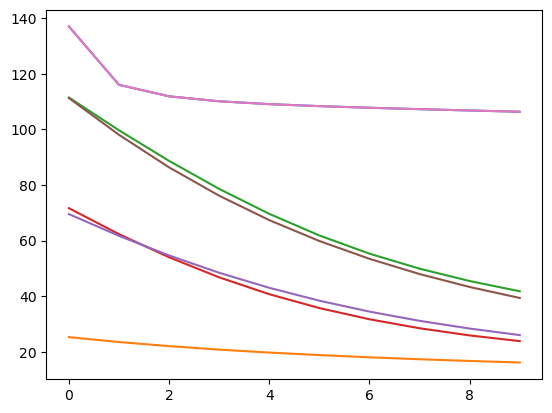

In [52]:
D_train_normalised = ((D_train[0] - np.average(D_train[0])) / np.std(D_train[0]), D_train[1])
D_test_normalised = ((D_test[0] - np.average(D_test[0])) / np.std(D_test[0]), D_test[1])
lambda1 = np.transpose(np.full(len(Z[0]), 0.01))
d = 5
N = 100
D = generateData(d, N)
etas = []
epochs = []
for m in range(d):
    etas.append(np.exp(m - 10))
print(etas)
x_testing = D_test_normalised[0]
y_testing = D_test_normalised[1]
x_trainning = D_train_normalised[0]
y_traning = D_train_normalised[1]
for i in range(0, d):
    par, vals = train(np.random.normal(0, 1, len(Z[0]) - 1), etas[i], N, (x_trainning, y_traning))
    epochs.append((par, vals))
D_train_normalised = ((D_train[0] - np.average(D_train[0])) / np.std(D_train[0]), D_train[1])
D_test_normalised = ((D_test[0] - np.average(D_test[0])) / np.std(D_test[0]), D_test[1])
lambda1 = np.transpose(np.full(len(Z[0]), 0.01))
d = 5
N = 100
D = generateData(d, N)
etas = []
epochs = []
for m in range(d):
    etas.append(np.exp(m - 10))
x_testing = D_test_normalised[0]
y_testing = D_test_normalised[1]
x_trainning = D_train_normalised[0]
y_traning = D_train_normalised[1]
for i in range(1, d):
    par, vals = train((np.random.normal(0, 1, len(x_trainning[0]))) * 0.01, etas[i], itterations,
                      (x_trainning, y_traning))
    epochs.append((par, vals))
plt.plot(vals)
for par, values in epoch:
    plt.plot(values)
# print(par)
print(np.min(vals))
plt.plot(vals)
plt.show()

In [53]:
# dummy varibles question

In [56]:

# data = pd.read_csv('DigitsDataSetForCW1.csv', sep=",")
# Z = data[['c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'c10',
#           'c11', 'c12', 'c13', 'c14', 'c15', 'c16', 'c17', 'c18', 'c19', 'c20',
#           'c21', 'c22', 'c23', 'c24', 'c25', 'c26', 'c27', 'c28', 'c29', 'c30',
#           'c31', 'c32', 'c33', 'c34', 'c35', 'c36', 'c37', 'c38', 'c39', 'c40',
#           'c41', 'c42', 'c43', 'c44', 'c45', 'c46', 'c47', 'c48', 'c49', 'c50',
#           'c51', 'c52', 'c53', 'c54', 'c55', 'c56', 'c57', 'c58', 'c59', 'c60',
#           'c61', 'c62', 'c63', 'c64', 'c65']].to_numpy()
dataset = pd.read_csv("DigitsDataSetForCW1.csv", sep=',').to_numpy()
[X, Y] = dataset[:, :-1], dataset[:, -1]

d01 = []
d12 = []
d23 = []
d30 = []
for i in range(len(dataset)):
    if dataset[i, -1] == 0 or dataset[i, -1] == 1:
        d01.append(dataset[i])
    elif dataset[i, -1] == 1 or dataset[i, -1] == 2:
        d12.append(dataset[i])
    elif dataset[i, -1] == 2 or dataset[i, -1] == 3:
        d23.append(dataset[i])
    elif dataset[i, -1] == 3 or dataset[i, -1] == 0:
        d30.append(dataset[i])

d01_training = (X[:len(d01) // 2], Y[:len(d01) // 2])
d01_testing = (X[len(d01) // 2:], Y[len(d01) // 2:])
d12_training = (X[:len(d12) // 2], Y[:len(d12) // 2])
d12_testing = (X[len(d12) // 2:], Y[len(d12) // 2:])
d23_training = (X[:len(d23) // 2], Y[:len(d23) // 2])
d23_testing = (X[len(d23) // 2:], Y[len(d23) // 2:])
d30_training = (X[:len(d30) // 2], Y[:len(d30) // 2])
d30_testing = (X[len(d30) // 2:], Y[len(d30) // 2:])

d01_training_normalised = ((d01_training[0] - np.average(d01_training[0])) / np.std(d01_training[0]), d01_training[1])
d01_testing_normalised = ((d01_testing[0] - np.average(d01_testing[0])) / np.std(d01_testing[0]), d01_testing[1])
d12_training_normalised = ((d12_training[0] - np.average(d12_training[0])) / np.std(d12_training[0]), d12_training[1])
d12_testing_normalised = ((d12_testing[0] - np.average(d12_testing[0])) / np.std(d12_testing[0]), d12_testing[1])
d23_training_normalised = ((d23_training[0] - np.average(d23_training[0])) / np.std(d23_training[0]), d23_training[1])
d23_testing_normalised = ((d23_testing[0] - np.average(d23_testing[0])) / np.std(d23_testing[0]), d23_testing[1])
d30_training_normalised = ((d30_training[0] - np.average(d30_training[0])) / np.std(d30_training[0]), d30_training[1])
d30_testing_normalised = ((d30_testing[0] - np.average(d30_testing[0])) / np.std(d30_testing[0]), d30_testing[1])

lambda1 = np.transpose(np.full(11, 0.01))
d = 50
N = 0.0001
eta = 0.0001
epoch = []
itterations = 10

lambda0 = np.random.normal(0, N, 64)

d01_X_training_normalised = d01_training_normalised[0]
d01_Y_training_normalised = d01_training_normalised[1]
d12_X_training_normalised = d12_training_normalised[0]
d12_Y_training_normalised = d12_training_normalised[1]
d23_X_training_normalised = d23_training_normalised[0]
d23_Y_training_normalised = d23_training_normalised[1]
d30_X_training_normalised = d30_training_normalised[0]
d30_Y_training_normalised = d30_training_normalised[1]

lambda_d01 = train(lambda0, eta, d, (d01_X_training_normalised, d01_Y_training_normalised))
lambda_d12 = train(lambda0, eta, d, (d12_X_training_normalised, d12_Y_training_normalised))
lambda_d23 = train(lambda0, eta, d, (d23_X_training_normalised, d23_Y_training_normalised))
lambda_d30 = train(lambda0, eta, d, (d30_X_training_normalised, d30_Y_training_normalised))

d01_X_training_normalised = d01_training_normalised[0]
d01_Y_training_normalised = d01_training_normalised[1]
d01_X_testing_normalised = d01_testing_normalised[0]
d01_Y_testing_normalised = d01_testing_normalised[1]
d12_X_training_normalised = d12_training_normalised[0]
d12_Y_training_normalised = d12_training_normalised[1]
d12_X_testing_normalised = d12_testing_normalised[0]
d12_Y_testing_normalised = d12_testing_normalised[1]
d23_X_training_normalised = d23_training_normalised[0]
d23_Y_training_normalised = d23_training_normalised[1]
d23_X_testing_normalised = d23_testing_normalised[0]
d23_Y_testing_normalised = d23_testing_normalised[1]
d30_X_training_normalised = d30_training_normalised[0]
d30_Y_training_normalised = d30_training_normalised[1]
d30_X_testing_normalised = d30_testing_normalised[0]
d30_Y_testing_normalised = d30_testing_normalised[1]

ERs = []

ERs.append(ER(lambda_d01, (d01_X_testing_normalised, d01_Y_testing_normalised)))

print(ERs)

plt.plot(lambda_d01[1])
plt.plot(lambda_d12[1])
plt.plot(lambda_d23[1])
plt.plot(lambda_d30[1])
for k in range(0, 10):
    image_matrix = np.reshape(X[k], (8, 8))
    plt.matshow(image_matrix)

/Users/haydenamarr/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/haydenamarr/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/haydenamarr/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/haydenamarr/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/haydenamarr/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.